# Week 8 : Lab 
 ## Data structures: Numerical arrays
 ##### CS1P - University of Glasgow - John Williamson - 2018/2019 Python 3.x

In [1]:
## RUN ME FIRST!
from image_audio import * 
import numpy as np
np.set_printoptions(suppress=True)
%matplotlib inline
print("Import worked OK")

Import worked OK


## Lab exercise
**You must make a reasonble attempt at this exercise to gain a tick for this work**.

<font color="red"> Remember to save your work frequently! </font>



## Purpose of this lab
This lab will familiarise you with using numerical arrays in Python using Numpy. This includes:
* creating arrays
* multi-dimensional slicing
* joining arrays
* array arithmetic and broadcasting
* vectorised operations
* images as arrays



## Before the lab
* Complete at least the A exercises.




## During the lab session

* Complete the B exercise. 


## A: Quick problems

### A.1 Box matrix

Write a function `box_matrix(rows, cols)` which creates a new matrix (a 2D NumPy array) with the given number of rows and columns, such that all elements are 0, *except* for the rows and columns at the "edges" of the matrix, which should be 1, (a "hollow" or "box" matrix").

**DO NOT USE ANY FORM OF LOOP**

So 

    box_matrix(2,2) =
        array([[ 1.,  1.],
               [ 1.,  1.]])
        
    box_matrix(4,4) =
        array([[ 1.,  1.,  1.,  1.],
               [ 1.,  0.,  0.,  1.],
               [ 1.,  0.,  0.,  1.],
               [ 1.,  1.,  1.,  1.]])
        
    box_matrix(3,6) =
        array([[ 1.,  1.,  1.,  1.,  1.,  1.],
               [ 1.,  0.,  0.,  0.,  0.,  1.],
               [ 1.,  1.,  1.,  1.,  1.,  1.]])
        

In [2]:
# Solution goes here
def box_matrix(rows, cols):
    box = np.zeros((rows, cols))
    box[0,:] = 1
    box[-1,:] = 1
    box[:,0] = 1
    box[:,-1] = 1
    return box
    
box_matrix(4,8)

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

## A. 2 Tiling
`np.tile(a, shape)` will copy `a` multiple times in a grid shape. For example, `np.tile(a, (2,2))` will copy an array twice in columns and twice in rows, joining the result together:

In [3]:
a = np.array([[1,0], [0,4]])
np.tile(a, (2,2))

array([[1, 0, 1, 0],
       [0, 4, 0, 4],
       [1, 0, 1, 0],
       [0, 4, 0, 4]])

Using `np.tile` create an array of the numbers `[1,2,3,4]` tiled into 4 columns and 4 rows, so that the resulting output is a 4x16 array of values, like this:

    [[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4],
     [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4],
     [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4],
     [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]]

Show the result as an image using `show_image(x)`, but divide every element of `x` by 4 before showing it.

DO NOT USE ANY FORM OF LOOP.

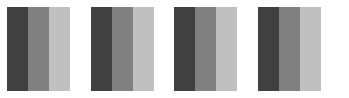

In [4]:
# Solution goes here
x = np.tile([1,2,3,4], (4,4))
show_image(x/4)

### A.3 Alpha mask
An grayscale image consists of a 2D array (matrix) of brightness values.
Combining two images together can be done by adding them together and dividing by 2.0, as below.

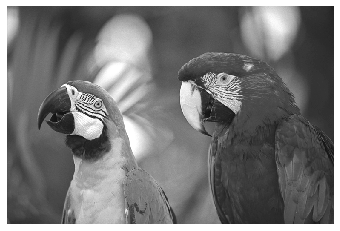

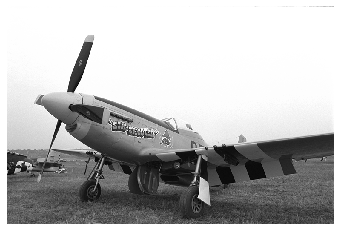

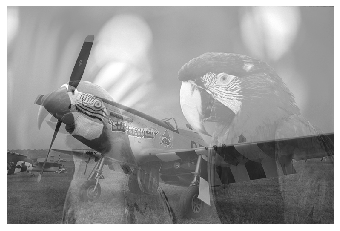

In [5]:
parrots = load_image_gray("imgs/parrots.png")
plane = load_image_gray("imgs/plane.png")
show_image(parrots)
show_image(plane)
show_image((plane+parrots)/2.0)

These are just plain old arrays, and we can do anything we want to the elements

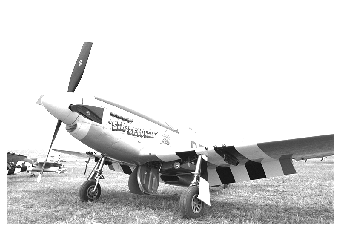

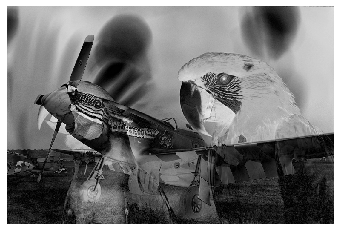

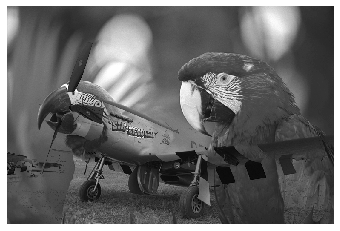

In [6]:
show_image(plane*2) # increase contrast
show_image(np.abs(plane - parrots)) # show absolute difference of images

# the equivalent of Photoshop's "Darken"  mode
show_image(np.where(plane<parrots, plane, parrots))

But to *composite* on image on top of another (e.g. to place an actor filmed in front of a green screen into a CGI background), we need to *selectively* mix to gether images. This is called *alpha masking* (this why the transparency option in some programs is called *alpha*).

There is a simple process: you take two images $X$ and $Y$, and a special third image $A$ called the **alpha mask** or sometimes the **matte**. $A$ is a grayscale image; where $A$ is white (elements = 1.0), $X$ shows through. Where $A$ is black (elements = 0.0), $Y$ shows through. Where $A=0.5$, $0.5X+0.5Y$ is mixed together.

The general formula for this masking is very simple $$Z = AX + (1-A)Y,$$ where $Z$ is the output image.

* An alpha mask is contained in the file `imgs/parrots_alpha.png`
* Load it (use `load_image_gray()`) and show it.
* Compute the alpha composited image (parrots on background) by implementing the equation above using ndarrays.  This is very simple and should not involve a loop!
* Show the composited image.

### Optional extension
Make this work in colour (use `load_image_colour()` to load a colour image; `show_image()` will still work to show it)


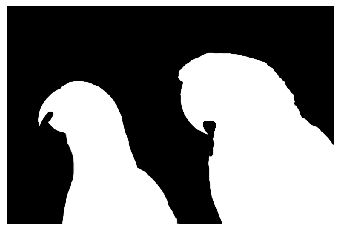

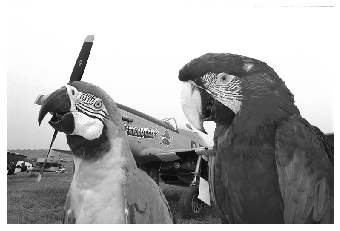

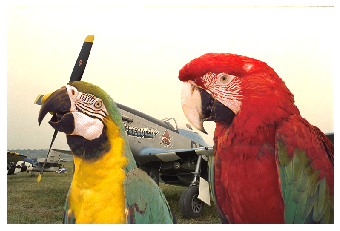

In [7]:
# Solution goes here
mask = load_image_gray("imgs/parrots_alpha.png")
show_image(mask)
show_image(mask*parrots+(1-mask)*plane)

parrots_colour = load_image_colour("imgs/parrots.png")
plane_colour = load_image_colour("imgs/plane.png")
mask_colour = load_image_colour("imgs/parrots_alpha.png")
show_image(mask_colour*parrots_colour+(1-mask_colour)*plane_colour)

## A.4 Sunspots
Astronomers have counted the number of visible **sunpots** on the sun every day since 1749. The code below loads this data (average daily sunspot count over one month intervals) as a Numpy array. It has three columns:

    index, year, mean sunspots

`year` is in the date in fractional years (e.g. 1800.5 means half way through 1800).

You can think of this like an Excel spreadsheet with data in it.

The index just increments from 1 upwards, and isn't interesting to us.

In [8]:
# load the data
sunspots = np.loadtxt("sunspots.csv", delimiter=",")    
print((sunspots.shape, sunspots.dtype))

((2820, 3), dtype('float64'))


In [9]:
# print the first five rows of this data

print(sunspots[:5, :])

[[   1.         1749.           58.        ]
 [   2.         1749.08333333   62.6       ]
 [   3.         1749.16666667   70.        ]
 [   4.         1749.25         55.7       ]
 [   5.         1749.33333333   85.        ]]


We can plot the sunspot data directly with `plot`. We will see the characteristic 11 year solar activity cycle.

Text(0, 0.5, 'Avg. daily sunpots')

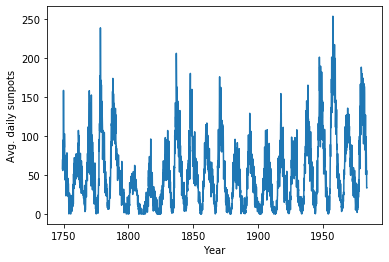

In [10]:
# plot second column (time in years) against third (number of sunspots)
plt.plot(sunspots[:,1], sunspots[:,2])
plt.xlabel("Year")
plt.ylabel("Avg. daily sunpots")

There are two useful operations in Numpy:
* `np.argmin(x)` returns the *index* at which `x` is smallest
* `np.argmax(x)` returns the *index* at which `x` is largest

In [11]:
x = [0.5, -0.2, 0.9, 1.8]
print(np.argmin(x)) 
print(np.argmax(x))

1
3


In [12]:
# we can use the numbers returned as indices
print(x[np.argmin(x)])
print(x[np.argmax(x)])

-0.2
1.8


**Without using any loops**, answer the following questions using array operations. You should be able to answer these in a single line of code.
1. What is the most number of sunspots seen?
1. What is the least number of sunspots seen?
1. What is the average (mean) number of sunspots seen each month?
1. What is the average number of sunspots for March? *Hint: there are 12 months in the year!*
1. In which year were most sunspots seen?

In [13]:
# Solution goes here
print("1.", np.max(sunspots[:,2]))
print("2.", np.min(sunspots[:,2]))
print("3.", np.mean(sunspots[:,2]))
print("4.", np.mean(sunspots[2::12,2]))
print("5.", sunspots[np.argmax(sunspots[:,2]), 1])

1. 253.8
2. 0.0
3. 51.265957446808514
4. 50.04085106382979
5. 1957.75000000296


# B: Simulations with arrays

You have been hired to demonstrate the artistic and expressive aspects of computer science. You have to build an installation to be displayed in a museum to show off what can be done.

You have two animated exhibits to produce:
* Firework particle explosion
* The Game of Life

You will implement this using numerical arrays to perform computations quickly and elegantly.

## B.1 Firework displays


We missed Guy Fawkes day, but we can simulate fireworks using a simple **particle system**. We will use very (*very*) basic physics to simulate how particles (in this case, little bits of fireworks) move around. We will use numerical arrays (NumPy arrays) to compute the movement of a "whole" firework at once.

The output from your code for this part should look like this:
<img src="imgs/fireworks.png">

We'll simulate this using a very set of simple equations that apply to a whole set of particles at the same time (i.e. vectorized operations).

## Particle system

Assume we can model a single firework explosion at a given time as a set of N points in 2D, i.e. an array of N rows of 2 columns (x and y).  

    [[x, y]
     [x, y]
     [x, y]
     ...
     ]
    
To simulate a firework exploding, we need to simulate the motion of these points "bursting out" from a central position and falling down.

Assume we also have some information about the initial velocity  of each particle (i.e. which way it went at the moment of detonation). This is a vector, and has two components, "dx" and "dy", the rate of movement in each of those two directions.

We can write a 2D vector in space at time $t$ as $\textbf{x_t}=[x,y]$ and a 2D velocity vector as $\textbf{dx_t} = [dx, dy]$.

We can predict where the particle is at time $t$ from where it was in the last time step $t-1$ using the equations:
$$\textbf{x}_{t} = \textbf{x}_{t_1} + \textbf{dx}_{t_1}$$
$$\textbf{dx}_{t} = d \textbf{dx}_{t-1}  - \textbf{g}$$

$d$ is a damping factor (from air resistance). $g$ is the gravitational vector, which accelerates towards the ground.

Note that x, g and dx  are vectors (they have $x$ and $y$ components), not just plain numbers!

## Random  numbers
We can use random numbers to give initial values for the velocities (after all, the particles all spread out in random ways when a firework goes off). The function `np.random.normal(mean, std, shape)` generates *normally distributed* values, centered on `mean` with a "spread" given by `std`, in an array of the given `shape`.

In [14]:
# 4 element vector, centered on 0, spread of 0.1
print((np.random.normal(loc=0, scale=0.1, size=(4,))))

[-0.11860937 -0.01427774 -0.05279361 -0.01644182]


In [15]:
# 8 element vector, centered on 0, spread of 10
print((np.random.normal(loc=0, scale=10, size=(8,))))

[ -4.13886116  -1.94226873  -3.08061014   6.63650118  13.09004092
 -12.78161153  -4.2566398   -6.89012389]


In [16]:
# 6x6 matrix, centered on 0, spread of 2
print((np.random.normal(loc=0, scale=2, size=(6,6))))

[[ 2.81950878 -1.2839195  -4.4229944   0.79816873  0.86418212  2.04673745]
 [-1.25841646 -1.62846542  0.37625123  5.9871451   1.18777573 -1.29384358]
 [-0.6108905   2.1481833   0.20707374 -2.22605035 -2.02843446 -1.62481181]
 [-2.76311006 -1.30332655 -1.75898892  0.42829534 -4.01428827 -0.01817822]
 [-0.47240268  1.74275501  1.88634664 -1.1331673  -1.68031881  0.17387758]
 [-0.53690467  2.93947084  2.27138914  1.55806638  2.15909816 -2.09289158]]


## Task 1
Implement the equations of motion for a single firework.

* You should start with all points at the same *position* $\textbf{x}$ (e.g. all at (0,0)), but with random velocities, using `np.random.normal()`, as above. 

* Start with 50 particles in the firework. Remember, the positions of every particle should be in *one single array*!

* To implement the gravity, remember you can modify a slice of an array (e.g. a column slice).

* Run the equations for 50 steps, updating the position and velocity. Each iteration should compute a new array.

* Use `plot_array(pts)` defined below to plot the positions *on each timestep*. Use the `s` optional parameter to set the size of the points to `50-i`, where i is the iteration number.

* To start, use gravity `g=[0, -0.01]`, damping `d=0.9`. Adjust these as you feel best.

* At the end, you should get a single, monochrome firework like this:

<img src="imgs/mono_firework.png">

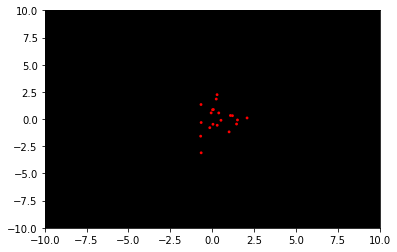

In [17]:
def plot_array(pts, c=None, s=8):
    """Plot pts (must be a Nx2 array) as points. 
    If c is specified, it must be an Nx4 array of RGBA values, giving
    the colour for each point."""
    plt.gca().set_facecolor('black')
    if c is None:
        plt.scatter(pts[:,0], pts[:,1], c='r', edgecolor="none", s=s)
    else:
        plt.scatter(pts[:,0], pts[:,1], c=np.clip(c,0,1), edgecolor="none", s=s)
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)

# Example: plot 20 random 2D points
plot_array(np.random.normal(0,1,(20,2)))

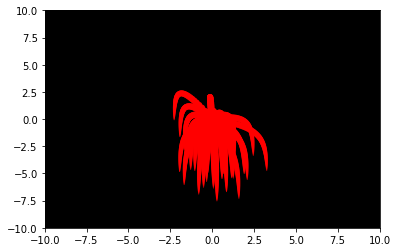

In [18]:
# Solution goes here
x = np.full((50,2), 0.0)
dx = np.random.normal(0, 0.15, (50,2))
g = np.array([0, 0.01])
damping = 0.9
for i in range(50):        
    plot_array(x, s=50-i)
    x += dx
    dx = damping * dx - g

### Task 2
* Plot several fireworks, each with a different random starting position.
* Start with 5 fireworks.
* `plot_array()` can take a second argument, `color`:
e.g. `plot_array(x, color)`
* The colours given to plot_array must be an Nx4 array (red, green, blue, alpha). The alpha column should initially be set to 1, so that the fireworks don't start out transparent. RGB should be values between 0 and 1.
* Choose a random colour for each firework, but with the alpha component set to 1.0. Note that you need to give a colour for each *particle* in the firework. (*hint*: how can `np.tile()` help you?)
* Make the colours fade as the simulation runs (i.e. they should get darker or more transparent in future time steps). Think about how the damping changed the velocity.

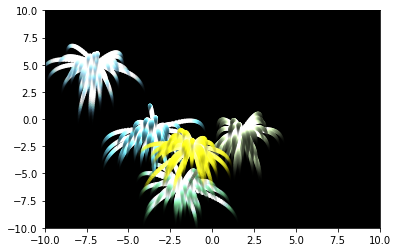

In [19]:
# Solution goes here
for i in range(5):
    x = np.full((50,2), 0.0)
    dx = np.random.normal(0,0.15, (50,2))
    g = np.array([0, 0.01])
    damping = 0.9
    color = np.random.uniform(0,20,(4,))
    color = np.tile(color, (50,1))
    x += np.random.normal(0,5, (2,))
    for i in range(30):        
        plot_array(x, color, s=30-i)
        x += dx
        dx *= damping
        color *= 0.85
        dx -= g

## B.2 Game of Life
The [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a very famous simulation; a kind of **cellular automaton**. It is not a game in the traditional sense of the word, but a kind of simulation which has many interesting and surprising properties. Given a particular starting patterns, unexpectedly complicated behaviours evolve, including moving objects ("spaceships"), repeating patterns ("oscillators"), patterns that shoot out spaceships ("guns") and many other structures.

<img src="imgs/billiards.gif" width="40%">
<img src="imgs/fencepost.gif" width="40%">

**Oscillating patterns**

<img src="imgs/slowship.gif"  width="40%">

**A large, slow spaceship**

<img src="imgs/glidergun.gif"  width="40%">

**A "glider gun", shooting out little glider spaceships**

<img src="imgs/sparktopifuse.gif"  width="40%">

**A "fuse reaction"**

The Game of Life works by simulating the birth and death of a very simplified model of a 2D grid of "cells" according to really simple rules. **All of the behaviours above arise from these rules**. It was invented by the mathematician John H. Conway in 1969

<img src="imgs/jhc.jpg">

*John H. Conway [Image Credit "Thane Plambeck" - "http://www.flickr.com/photos/thane/20366806/", CC BY 2.0, https://commons.wikimedia.org/w/index.php?curid=13076802]*

The Game of Life assumes that these "cells" are represented as a big 2D array (like a giant chessboard), where each element of the array can be 1 (on/alive) or 0 (off/dead). Rules are defined which, given a array of cells in one instant, determine how the cells should evolve in the next instant. 

[There's more background in this blog post](https://www.howell.io/2016/07/08/exploring-conways-game-of-life/)

### Rules
* We imagine that we loop over every entry in an array, and at that position look at the 3x3 **neighbourhood** of cells that surrounds that entry. That is every array entry that is one step horizontally, vertically or diagonally away from the point we are considering.

In this diagram `a,b,c,d,g,h,i` are all neighbours of `E`

    a b c
    d E f
    g h i

* For each cell in the array:
    * Check all eight neighbours in a 3x3 grid around the cell
    * If cell was already on, and there are exactly 2 neighbours, the cell stays on in the next timestep.
    * If there are exactly three neighbours, the cell becomes on in the next timestep, regardless of whether it was on or off before.
    * Otherwise, the cell becomes off in the next timestep.

The eight neighbours of a cell look like this:

<img src="imgs/moore.png" width="200px">

### The rule
#### Still Lifes
The Game of Life rule has very interesting properties. Some arrangements of cells ("patterns") are **stable** and never change, like 4 on cells in a 2x2 grid, surrounded by all off cells.

    0 0 0 0
    0 1 1 0
    0 1 1 0
    0 0 0 0

<img src="imgs/block.png">

These are called **still lifes**.

#### Oscillators
Other patterns continuously oscillate between two states, like 3 cells in a line:

    0 0 0 0 0
    0 1 1 1 0
    0 0 0 0 0
    
<img src="imgs/blinker.gif">

Patterns like these are called **oscillators**

#### Spaceships
Remarkably, there are discrete equivalents of *waves* in this simulation; patterns which appear to move across empty space.

       0 0 0 0 0
       0 1 1 1 0
       0 1 0 0 0
       0 0 1 0 0
       0 0 0 0 0

<img src="imgs/glider.gif">

These are called **spaceships** and are much, much rarer than any of the other patterns we have seen so far.

------




### Task
The Game of Life is very easy to represent as a big numerical array, each element of the array corresponding to a cell. Your task is to implement the Game of Life using arrays.
#### next_generation()
You need to write a function `next_generation(cells)`, which given a numerical array `cells` consisting of 0s and 1s, returns a new array of 0s and 1s obeying the Game of Life rules. 

You can use `show_image(cells)` to show the output array. Test your function on the  block and blinker examples before going further.

Then, write a function `simulate(cells, n)` which will apply `next_generation` `n` times to the `cells`, and show an animation of the process by redrawing the image on each generation.

You can use `update_image(cells)` to update a drawing without creating a completely new image for each update; this lets you show an *animation* as `simulate()` runs. Note that you **must** call `show_image()` the first time you draw the image (to create a new blank figure canvas), and call `update_image()` to update the figure.

#### Correct simulation
**Note**: to get the simulation correct, you need create a new array and copy the values in. If you try and modify the cells in place, you will get completely incorrect behaviour (unless you are very clever with the array ops!).

#### Shape
Keep the shape of `cells` the same on each application of `next_generation()`. Note that you will have to do something at the edges of the array, where there aren't a full set of neighbour cells (e.g. what is top left of the the top left cell?). 

#### Wrapping at the edges
A common solution is just to assume that the array "wraps around" at the edges (e.g. that the leftmost element is next to the rightmost element). This is very easy to implement using the % operator, which allows you to force a value to lie within a certain range; see the example below to see why:

In [20]:
# forwards:
for i in range(12):
    print(i, i % 5, " ", end=' ')
print()

# backwards
for i in range(0,-12,-1):
    print(i, i % 5, " ", end=' ')

0 0   1 1   2 2   3 3   4 4   5 0   6 1   7 2   8 3   9 4   10 0   11 1   
0 0   -1 4   -2 3   -3 2   -4 1   -5 0   -6 4   -7 3   -8 2   -9 1   -10 0   -11 4   

### Test patterns
There are some test patterns provided for you. `load_pattern(name, padding)` returns a 2D array with the given pattern, with `padding` 0 (off) cells around it. You can check that this is just a standard Numpy array. 
The padding argument allows you to get an array with enough room for a pattern to "grow".

These patterns include:
* `block` the 2x2 pattern above, which should not change
* `blinker` the 3x1 pattern above, which should switch between vertical and horizontal
* `glider` the spaceship above, which should move up and to the right.

There are many more.

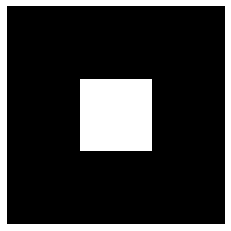

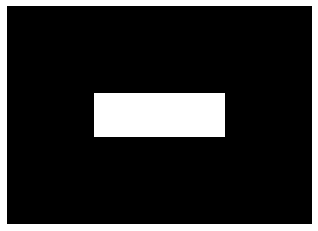

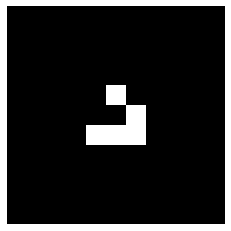

In [21]:
import lifeparsers

# load the block
block = lifeparsers.load_life("life/block.l")
show_image(block)

# load the blinker
blinker = lifeparsers.load_life("life/blinker.l")
show_image(blinker)

# load the glider (with some extra padding)
glider = lifeparsers.load_life("life/glider.l", padding=4)
show_image(glider)

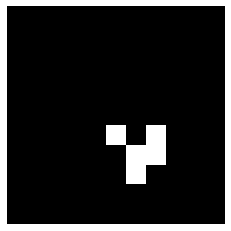

In [22]:
# Solution goes here
def next_generation(pattern):
    r,c = pattern.shape
    next_pattern = np.zeros((r,c))    
    for i in range(r):
        for j in range(c):
            count = 0
            count += pattern[(i+1)%r,(j)%c]
            count += pattern[(i+1)%r,(j+1)%c]
            count += pattern[(i+1)%r,(j-1)%c]
            count += pattern[(i-1)%r,(j)%c]            
            count += pattern[(i-1)%r,(j+1)%c]
            count += pattern[(i-1)%r,(j-1)%c]
            count += pattern[(i)%r,(j-1)%c]
            count += pattern[(i)%r,(j+1)%c]
            if count==3 or (count==2 and pattern[i,j]!=0):
                next_pattern[i,j] = 1
    return next_pattern

def simulate(pattern, n):
    show_image(pattern)
    for i in range(n):
        pattern = next_generation(pattern)
        update_image(pattern)

simulate(glider, 5)

##### Question: what does the pattern "rake.l" do?
If you've implemented `simulate()` correctly, the following will work:

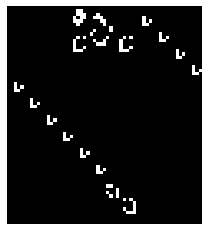

In [23]:
rake = lifeparsers.load_life("life/rake.l", padding=20)
simulate(rake, 200)

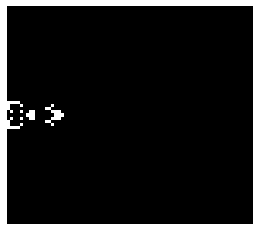

In [24]:
mystery = np.rot90(lifeparsers.load_life("life/schick.l", padding=30))
simulate(mystery, 60)

Despite the extremely simple rules, patterns in the Game of Life have an enormous diversity of behavior, with strange and intricate constructions like **puffer trains**, **rakes**, **breeders**, **Herschel tracks** and **guns**. It has been shown to be possible to create patterns which copy themselves (reproduce), although these are extremely complex.

It is even possible to implement a complete working computer as a pattern in the Game of Life -- a computer fabricated from cells which can compute anything a "real world" computer can (but extraordinarly slowly). 

# C: Extended problems
<div class="alert alert-box alert-danger">
    
These *extended* problems are optional for students who are keen to learn more. If you've
finished the whole lab and want to explore these ideas in more depth, these problems and resources are intended to help you do that. You do not need to attempt any of this section to receive a tick! 
</div>

## C.1 Boids
Fair warning: this is a hard problem. It is acheivable, but only attempt it if you are both enthusaistic and very comfortable with the array operations we have seen so far.

Extend the fireworks code to implement the *boids* animation algorithm explained at http://www.vergenet.net/~conrad/boids/pseudocode.html
(a high level explanation can be read at https://cs.stanford.edu/people/eroberts/courses/soco/projects/2008-09/modeling-natural-systems/boids.html)

This models the "flocking" behaviour of birds. It is widely used in computer animation. For example, the motion of the famous wildebeest stampede scene in the Lion King was computed with a modified Boids algorithm.

Represents your boids as a single Numpy array. Use columns to represent x,y,dx,dy, and any other per-boid values you need.

Use the `plot_array` from the fireworks example to plot your results. I recommend calling `plt.clf()` before each `plot_array()`  to clear the drawing each time (otherwise you will run into slowdowns, and you'll have a big trail behind all of your Boids).

Start with a simple 2D model of the Boids. You can implement a 3D model as well, but you will need to be able to project it onto 2D to draw it!


## C.2 Drum sounds
1D arrays can be used to represent sounds. In this task, you will implement a digital drum machine using only simple mathematical functions.
<img src="imgs/tr808.jpg">

*Image credit: By Eriq at Dutch Wikipedia, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=38020306*

A pure tone is a *sine wave*. A sine wave can be computed by taking the `sin()` of an increasing number (e.g. generated by linspace)

In [25]:
# Warning: loud bass!
# 10000 = 10000 samples = ~1/4 second of sound (44100 samples/second)
tone = np.sin(np.linspace(0,100,10000))
play_sound(tone)

Different volume can be achieved by scaling the tone, and different pitches by scaling the value *inside* the np.sin()

In [26]:
# multiply *outside* the sine (try changing the 0.2)
quiet_tone = np.sin(np.linspace(0,100,10000))*0.2
play_sound(quiet_tone)

In [27]:
# multiply *inside* the sine (try changing the 4)
high_tone = np.sin(np.linspace(0,100,10000)*4)
play_sound(high_tone) # loud!

## Task
Work out how to make a kick drum sound. My kick sounds like this:

<audio controls="controls">  <source src="imgs/kick.wav"  type="audio/wav">  </audio>

A kick drum decreases in pitch and volume over time. *An exponentially decaying function is particularly useful here.*

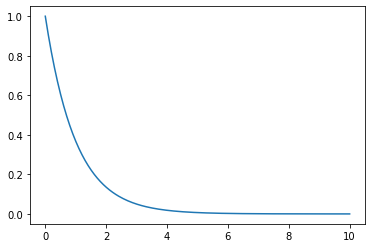

In [28]:
# an exponentially decaying function
# this can be used to vary volume over time
a = np.linspace(0,10,200)
plt.plot(a, np.exp(-a))

You can distort sounds using `np.tanh()`, as shown below. Use this to improve your drum sound.

In [29]:
tone = np.sin(np.linspace(0,100,10000))
# note we scale up the array *inside* the tanh() and then scale it down again
play_sound(np.tanh(tone*10)*0.5)

In [30]:
# Solution goes here
tone = np.linspace(0,200,11000)
amp_drop = np.exp(-(tone/10.0))
freq_drop = np.exp(-(tone/60.0))
kick = np.sin(tone*freq_drop)*amp_drop
kick = np.tanh(kick*8)
play_sound(kick)

## Task 2
Now observe that random numbers sound like noise:

In [31]:
noise = np.random.uniform(-1,1,10000)*0.2
play_sound(noise)

Implement a hihat drum sound. Create a long and a short hihat.

<audio controls="controls">  <source src="imgs/hat.wav" type="audio/wav">  </audio>

<audio controls="controls">  <source src="imgs/long_hat.wav" type="audio/wav">  </audio>


In [32]:
# Solution goes here
noise = np.random.uniform(-1,1,2000)*0.5
tone = np.linspace(0,100,2000)
amp_drop = np.exp(-(tone/20.0))
hat = amp_drop*noise
play_sound(hat)

In [33]:
# Solution goes here
noise = np.random.uniform(-1,1,10000)*0.5
tone = np.linspace(0,100,10000)
amp_drop = 2**(-(tone/30.0))
long_hat = amp_drop*noise*0.6
play_sound(long_hat)

Finally, assemble your sounds into a beat by concatenating together your drum sounds. You will need to pad your sounds with zeros such that they are all the same length if you don't want the timing to be horrible!
<audio controls="controls">  <source src="imgs/beat.wav" type="audio/wav">  </audio>


In [34]:
# Solution goes here
k = np.zeros((11000,))
h = np.zeros((11000,))
l = np.zeros((11000,))
s = np.zeros((11000,))
h[:len(hat)] = hat
k[:len(kick)] = kick
l[:len(long_hat)] = long_hat*0.5
kh = k+h
kl = k+np.tanh(l*10)
play_sound(np.concatenate([kh,l,kl,h]*6+[kh,s,kh,kh,h,h,h,h]))